In [1]:
from stable_baselines3 import PPO

import pandas as pd
import numpy as np

from captum.attr import ShapleyValueSampling
import torch
import plotly.figure_factory as ff
import plotly.express as px

import KBMproject.utilities as utils

%matplotlib inline

In [6]:
AGENT_NAME = 'default_PPO_citylearn_challenge_2022_phase_2_Building_6_20_bins_500.zip'
PROXY_NAME = 'surrogates\imitator.pth'
SAMPLES = 10_000

In [7]:
df_agent = pd.read_csv(r'rebaseline obs.csv',)
df_agent['actions'] = pd.read_csv(r'rebaseline a.csv',)

In [8]:
agent_svs = ShapleyValueSampling(
    utils.extract_actor(
        PPO.load(path=f"{AGENT_NAME}")
    )
)

In [9]:
proxy_svs = ShapleyValueSampling(
    torch.load(PROXY_NAME)
)

In [10]:
agent_shap = agent_svs.attribute(torch.from_numpy(df_agent.drop(columns=['actions']).to_numpy().astype('float32')).to('cuda'),
                             target=torch.from_numpy(df_agent['actions'].to_numpy().astype('int64')).to('cuda'),
                             n_samples=SAMPLES,
                             show_progress=True,
                             ).detach().cpu().numpy()

Shapley Value Sampling attribution:   0%|          | 0/310001 [00:00<?, ?it/s]

In [11]:
proxy_shap = proxy_svs.attribute(torch.from_numpy(df_agent.drop(columns=['actions']).to_numpy().astype('float32')).to('cuda'),
                             target=torch.from_numpy(df_agent['actions'].to_numpy().astype('int64')).to('cuda'),
                             n_samples=SAMPLES,
                             show_progress=True,
                             ).detach().cpu().numpy()

Shapley Value Sampling attribution:   0%|          | 0/310001 [00:00<?, ?it/s]

In [21]:
df_mean_shap = pd.DataFrame([agent_shap.mean(axis=0),proxy_shap.mean(axis=0)],
                            index=['500_Training_Episodes','Imitator'],
                            columns=pd.read_csv('baseline_obs.csv',nrows=0, index_col=0).columns.to_list(),
                            )

<Axes: title={'center': 'Comparision of Mean Feature Importance Between Agent and Proxy Imitator'}, xlabel='Features', ylabel='Mean Absolute Shapley Value Sample'>

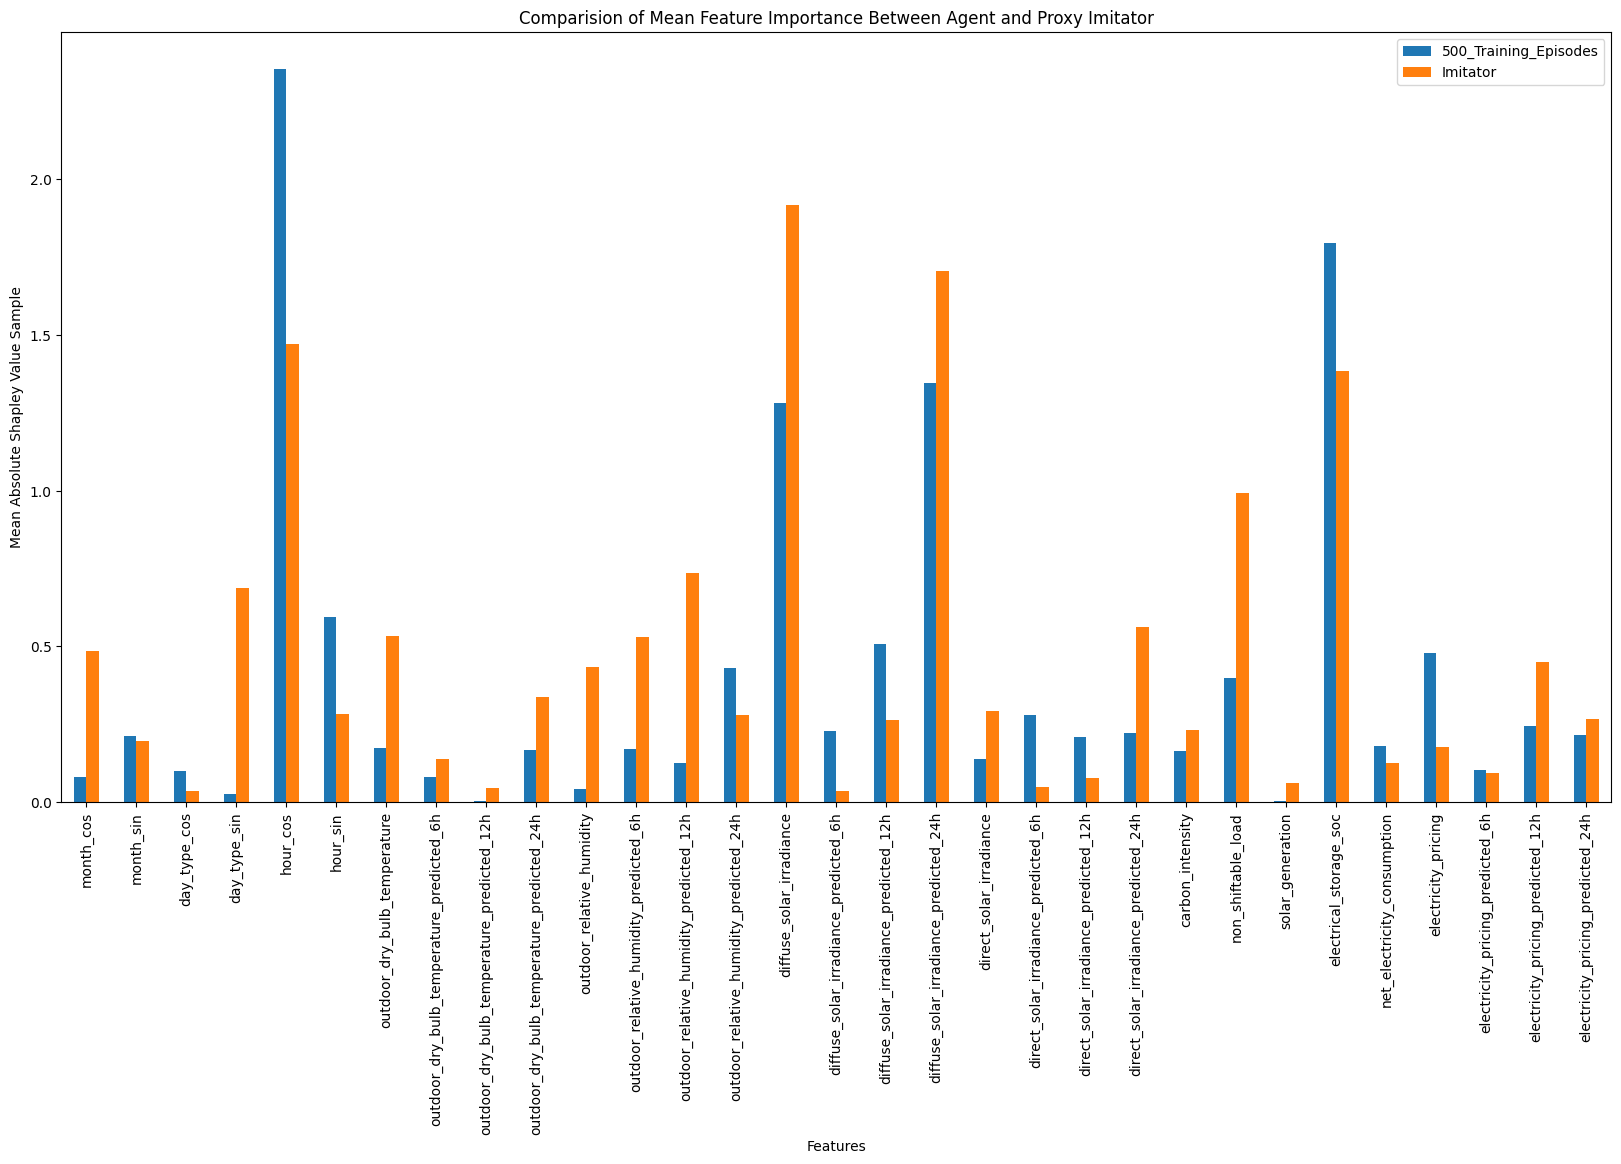

In [35]:
df_mean_shap.T.abs().plot.bar(
    xlabel='Features',
    ylabel='Mean Absolute Shapley Value Sample',
    title='Comparision of Mean Feature Importance Between Agent and Proxy Imitator',
    figsize=(20,10),
)

<Axes: title={'center': 'Comparision of Mean Feature Importance Between Agent and Proxy Imitator'}, xlabel='Features', ylabel='Mean Absolute Shapley Value Sample'>

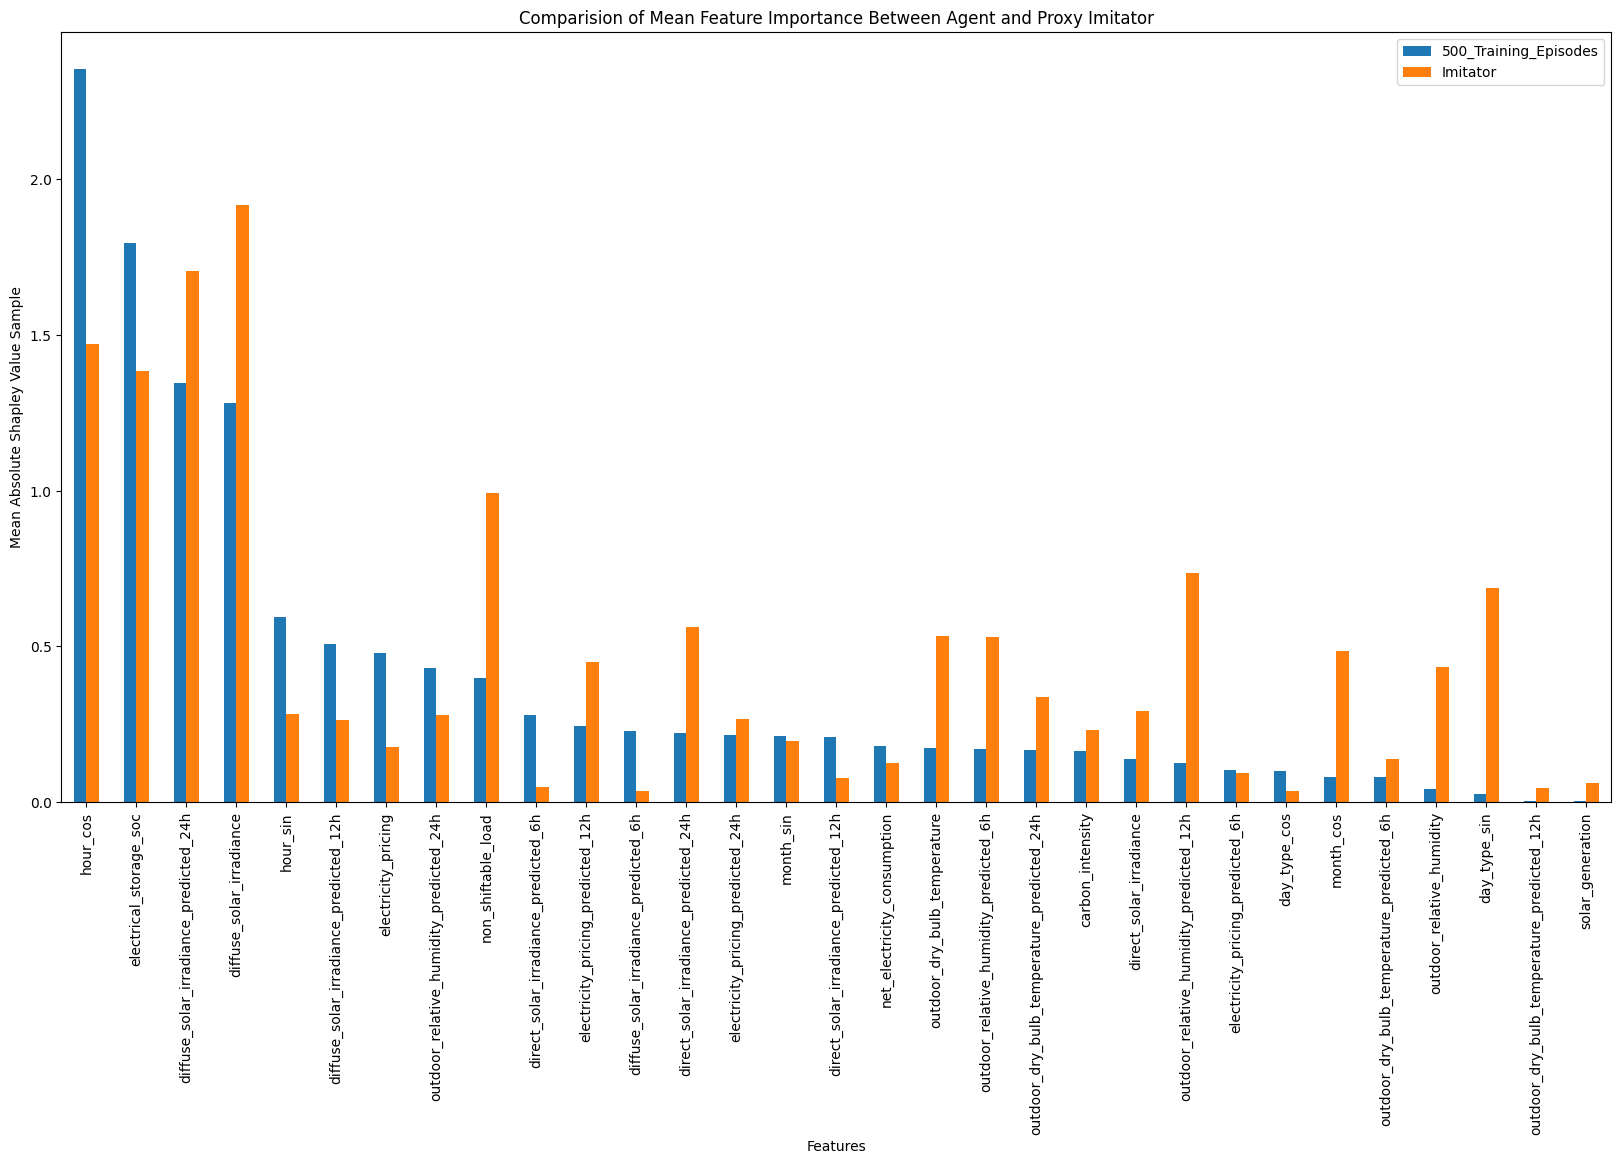

In [34]:
df_mean_shap.T.abs().sort_values(by='500_Training_Episodes',ascending=False).plot.bar(
    xlabel='Features',
    ylabel='Mean Absolute Shapley Value Sample',
    title='Comparision of Mean Feature Importance Between Agent and Proxy Imitator',
    figsize=(20,10),
)

In [28]:
df_mean_shap.T['500_Training_Episodes'].abs().sort_values(ascending=False)

hour_cos                                      2.355542
electrical_storage_soc                        1.795533
diffuse_solar_irradiance_predicted_24h        1.346332
diffuse_solar_irradiance                      1.281898
hour_sin                                      0.594111
diffuse_solar_irradiance_predicted_12h        0.509007
electricity_pricing                           0.478321
outdoor_relative_humidity_predicted_24h       0.430850
non_shiftable_load                            0.398776
direct_solar_irradiance_predicted_6h          0.279375
electricity_pricing_predicted_12h             0.243011
diffuse_solar_irradiance_predicted_6h         0.227415
direct_solar_irradiance_predicted_24h         0.222293
electricity_pricing_predicted_24h             0.215140
month_sin                                     0.211802
direct_solar_irradiance_predicted_12h         0.209308
net_electricity_consumption                   0.180699
outdoor_dry_bulb_temperature                  0.173297
outdoor_re

In [30]:
df_mean_shap.T['Imitator'].abs().sort_values(ascending=False)

diffuse_solar_irradiance                      1.917995
diffuse_solar_irradiance_predicted_24h        1.706054
hour_cos                                      1.472231
electrical_storage_soc                        1.384013
non_shiftable_load                            0.991347
outdoor_relative_humidity_predicted_12h       0.737328
day_type_sin                                  0.686504
direct_solar_irradiance_predicted_24h         0.563777
outdoor_dry_bulb_temperature                  0.533588
outdoor_relative_humidity_predicted_6h        0.531913
month_cos                                     0.484925
electricity_pricing_predicted_12h             0.449549
outdoor_relative_humidity                     0.435256
outdoor_dry_bulb_temperature_predicted_24h    0.337048
direct_solar_irradiance                       0.293037
hour_sin                                      0.282339
outdoor_relative_humidity_predicted_24h       0.279519
electricity_pricing_predicted_24h             0.267311
diffuse_so

In [32]:
df_mean_shap.T['Imitator'].abs().sort_values(ascending=False).index.to_list()

['diffuse_solar_irradiance',
 'diffuse_solar_irradiance_predicted_24h',
 'hour_cos',
 'electrical_storage_soc',
 'non_shiftable_load',
 'outdoor_relative_humidity_predicted_12h',
 'day_type_sin',
 'direct_solar_irradiance_predicted_24h',
 'outdoor_dry_bulb_temperature',
 'outdoor_relative_humidity_predicted_6h',
 'month_cos',
 'electricity_pricing_predicted_12h',
 'outdoor_relative_humidity',
 'outdoor_dry_bulb_temperature_predicted_24h',
 'direct_solar_irradiance',
 'hour_sin',
 'outdoor_relative_humidity_predicted_24h',
 'electricity_pricing_predicted_24h',
 'diffuse_solar_irradiance_predicted_12h',
 'carbon_intensity',
 'month_sin',
 'electricity_pricing',
 'outdoor_dry_bulb_temperature_predicted_6h',
 'net_electricity_consumption',
 'electricity_pricing_predicted_6h',
 'direct_solar_irradiance_predicted_12h',
 'solar_generation',
 'direct_solar_irradiance_predicted_6h',
 'outdoor_dry_bulb_temperature_predicted_12h',
 'day_type_cos',
 'diffuse_solar_irradiance_predicted_6h']

In [33]:
df_mean_shap.T['500_Training_Episodes'].abs().sort_values(ascending=False).index.to_list()

['hour_cos',
 'electrical_storage_soc',
 'diffuse_solar_irradiance_predicted_24h',
 'diffuse_solar_irradiance',
 'hour_sin',
 'diffuse_solar_irradiance_predicted_12h',
 'electricity_pricing',
 'outdoor_relative_humidity_predicted_24h',
 'non_shiftable_load',
 'direct_solar_irradiance_predicted_6h',
 'electricity_pricing_predicted_12h',
 'diffuse_solar_irradiance_predicted_6h',
 'direct_solar_irradiance_predicted_24h',
 'electricity_pricing_predicted_24h',
 'month_sin',
 'direct_solar_irradiance_predicted_12h',
 'net_electricity_consumption',
 'outdoor_dry_bulb_temperature',
 'outdoor_relative_humidity_predicted_6h',
 'outdoor_dry_bulb_temperature_predicted_24h',
 'carbon_intensity',
 'direct_solar_irradiance',
 'outdoor_relative_humidity_predicted_12h',
 'electricity_pricing_predicted_6h',
 'day_type_cos',
 'month_cos',
 'outdoor_dry_bulb_temperature_predicted_6h',
 'outdoor_relative_humidity',
 'day_type_sin',
 'outdoor_dry_bulb_temperature_predicted_12h',
 'solar_generation']